In [1]:
import pandas as pd
import numpy as np
import networkx as nx

In [13]:
hubs = ['ALBE', 'ALDE', 'AT', 'BE', 'CZ', 'DE_LU', 'FR', 'HR', 'HU', 'NL', 'PL', 'RO', 'SI', 'SK']
zones = ['AT', 'BE', 'CZ', 'DE_LU', 'FR', 'HR', 'HU', 'NL', 'PL', 'RO', 'SI', 'SK']

In [14]:
df_ptdf = pd.read_excel('ptdf_z_reduced.xlsx', index_col=0)

In [15]:
df_substations = pd.read_excel('substations.xlsx', index_col=0)
df_grid = pd.read_excel('./grid.xlsx', index_col=0)
df_grid = df_grid[df_grid.susceptance != 0]
Grid = nx.from_pandas_edgelist(df_grid, 'substation_1', 'substation_2', edge_attr=["susceptance"])

"""
observed_lines = df_ptdf.line_id.unique()
df_observed_lines = df_grid[df_grid.index.isin(observed_lines)]
observed_nodes = set(df_observed_lines.substation_1).union(df_observed_lines.substation_2)
df_substations = df_substations[df_substations.index.isin(observed_nodes)]

observed_nodes_corrected = []
for node in list(observed_nodes):
    observed_nodes_corrected.append(list(Grid.nodes).index(node))
"""

ptdf_n_matrix = np.load('ptdf_n.npy')
gsk1_matrix = np.load('gsk1_matrix.npy')
gsk2_matrix = np.load('gsk2_matrix.npy')
gsk3_matrix = np.load('gsk3_matrix.npy')

In [5]:
ptdf_z_t = []

for t, row in enumerate(gsk1_matrix[0:1]):
    print(t)
    ptdf_z = np.matmul(ptdf_n_matrix, gsk1_matrix)
    ptdf_z_t.append(ptdf_z)

0


In [6]:
selected_zone = 'DE_LU'
selected_zone_i = 5
selected_line = 12

print(len(ptdf_n_matrix))
print(len(ptdf_z_t[0])) # [selected_line][selected_zone_i]

2102
5064


<Axes: xlabel='DateTime'>

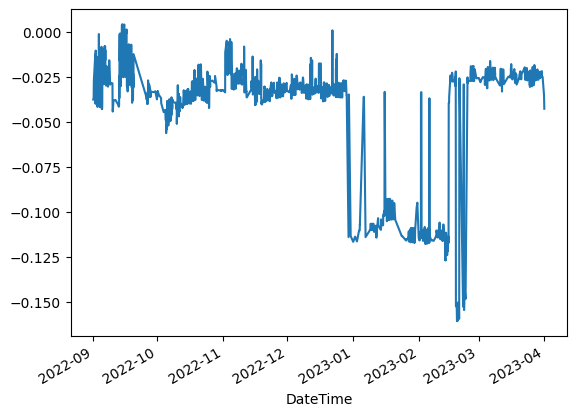

In [17]:
df_ptdf_timeseries = df_ptdf[df_ptdf.line_id == 94]
df_ptdf_timeseries.index = pd.to_datetime(df_ptdf_timeseries['DateTime'])
#df_ptdf_timeseries['test'] = ptdf_t
df_ptdf_timeseries['DE_LU'].plot()

In [18]:
display(df_ptdf[1:20])

,DateTime,line_id,ram,ALBE,ALDE,AT,BE,CZ,DE_LU,FR,HR,HU,NL,PL,RO,SI,SK
1,2022-09-01,94,653.000000,-0.019600,-0.020160,-0.021460,-0.019940,-0.072370,-0.037740,-0.023400,-0.007990,-0.000630,-0.015850,0.082020,0.000820,-0.011220,0.007690
2,2022-09-01,152,1140.000000,-0.123610,-0.090080,0.007770,-0.134080,0.006720,-0.002220,-0.140700,-0.003950,0.001760,-0.071220,0.003640,0.000300,-0.004440,0.003040
3,2022-09-01,223,919.000000,-0.088810,-0.116440,0.012790,-0.082860,-0.021460,-0.007370,0.006380,0.009440,-0.003090,-0.097610,-0.025080,-0.000780,0.012330,-0.009380
4,2022-09-01,333,887.000000,0.083420,0.081460,-0.018330,0.084800,-0.006460,0.058030,0.097120,0.007620,-0.004400,0.075000,0.005170,-0.000530,0.008700,-0.004570
5,2022-09-01,493,390.000000,-0.061860,-0.062380,-0.064990,-0.061810,-0.024900,-0.063030,-0.060250,-0.002730,0.003400,-0.061440,-0.021830,0.000100,-0.002590,-0.002000
6,2022-09-01,538,1212.000000,0.151680,0.152000,0.176970,0.151690,0.152910,0.153400,0.151030,0.051650,-0.039700,0.151020,0.092900,-0.002990,0.105250,0.023830
7,2022-09-01,694,1084.000000,0.189440,0.043580,-0.002140,0.195350,0.008630,0.017900,-0.072750,-0.004290,0.001510,0.088530,0.009930,0.000350,-0.005400,0.004010
8,2022-09-01,698,995.000000,-0.119570,-0.031860,0.001230,0.190740,-0.005470,-0.011110,0.047170,0.002720,-0.000960,-0.037480,-0.006200,-0.000220,0.003410,-0.002540
9,2022-09-01,711,1008.000000,0.337750,0.026270,-0.000980,-0.160400,0.004490,0.009090,-0.039170,-0.002230,0.000790,0.029500,0.005080,0.000180,-0.002800,0.002080
10,2022-09-01,712,933.000000,-0.802960,0.010770,-0.000500,-0.056360,0.001870,0.003870,-0.014560,-0.000930,0.000320,0.015470,0.002150,0.000080,-0.001170,0.000870
